# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker_submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [40]:
dataframe = pd.read_csv('../data/checker_submits.csv')
dataframe.head(5)

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104


In [41]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uid        1686 non-null   object
 1   labname    1686 non-null   object
 2   numTrials  1686 non-null   int64 
 3   timestamp  1686 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.8+ KB


In [42]:
df = dataframe.copy()
date = pd.to_datetime(df['timestamp'])
df['hour'] = date.dt.hour
df['dayofweek'] = date.dt.day_of_week
df.drop(columns='timestamp', inplace=True)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [43]:
cat_att = df.select_dtypes(include='object')
num_att = df.select_dtypes(include='number')

In [44]:
cat_encoder = OneHotEncoder()
df_cat = cat_encoder.fit_transform(cat_att)
cat_att = pd.DataFrame(df_cat.toarray(), columns=cat_encoder.get_feature_names_out())
cat_att

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
scaler = StandardScaler()
num_att[['numTrials', 'hour']] = scaler.fit_transform(num_att[['numTrials', 'hour']])
num_att

,numTrials,hour,dayofweek
0,-0.788667,-2.562352,4
1,-0.756764,-2.562352,4
2,-0.724861,-2.562352,4
3,-0.692958,-2.562352,4
4,-0.661055,-2.562352,4
...,...,...,...
1681,-0.533442,0.945382,3
1682,-0.629151,0.945382,3
1683,-0.597248,0.945382,3
1684,-0.565345,0.945382,3


In [46]:
result = pd.concat([num_att, cat_att], axis=1)
result.head(5)

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
result.to_csv('../data/dayofweek.csv', index=False)

In [48]:
most_popular = result['dayofweek'].mode()[0]
score = accuracy_score(result['dayofweek'], [most_popular] * len(result))
score

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [49]:
X = result.drop(columns=['dayofweek'])
y = result['dayofweek']

In [63]:
log_reg = LogisticRegression(random_state=21, fit_intercept=False)
log_reg.fit(X, y)
log_reg.score(X, y)

0.6405693950177936

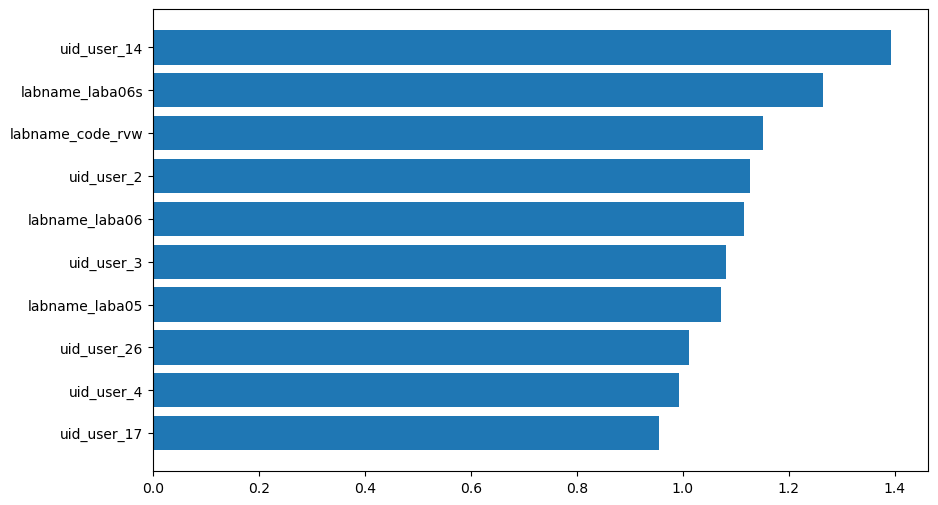

In [51]:
features= np.array([np.mean(np.abs(i)) for i in log_reg.coef_.T])
top_index = np.argsort(features)[-10:]

top_features = top_index[::-1]
top_importance = features[top_features][::-1]
top_feature_names = X.columns[top_features][::-1]

def plot_barh(top_names, top_coef):
    plt.figure(figsize=(10, 6))
    plt.barh(top_names, top_coef)
    plt.show()

plot_barh(top_feature_names, top_importance)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [ ]:
svc = SVC(kernel='linear', probability=True, random_state=21)
svc.fit(X, y)
svc.score(X,y)

0.702846975088968

In [56]:
clf = OneVsRestClassifier(svc).fit(X, y)
clf.score(X, y)

0.6126927639383155

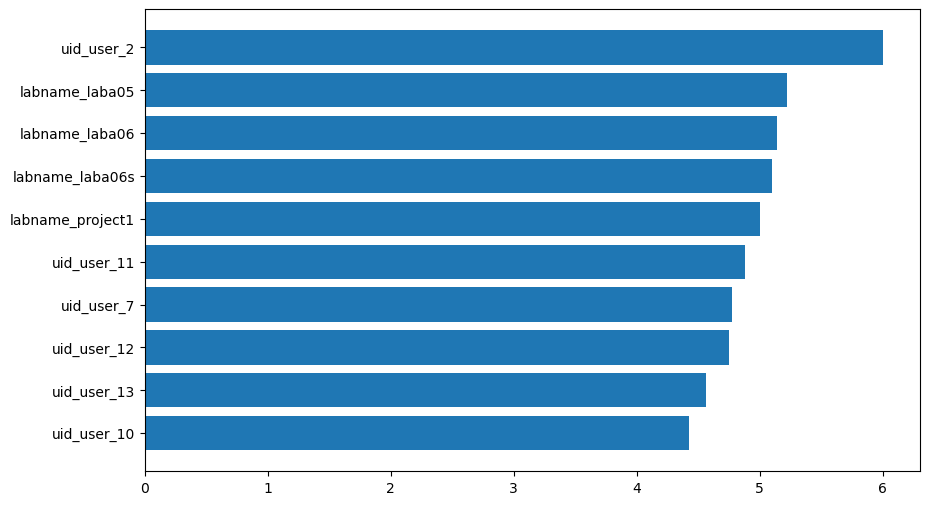

In [57]:
importance = np.zeros(X.shape[1])
for classifier in clf.estimators_:
    importance += np.abs(classifier.coef_[0])  # Суммируем абсолютные значения коэффициентов

# Индексы топ-10 наиболее важных признаков
top_index = np.argsort(importance)[-10:]

# Подготовка данных для графика
top_features = top_index[::-1]  # Обратный порядок для правильной сортировки
top_importance = importance[top_features][::-1]
top_feature_names = X.columns[top_features][::-1]

# # Построение графика
plot_barh(top_feature_names, top_importance)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [58]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21)
tree.fit(X, y)
tree.score(X, y)

0.5516014234875445

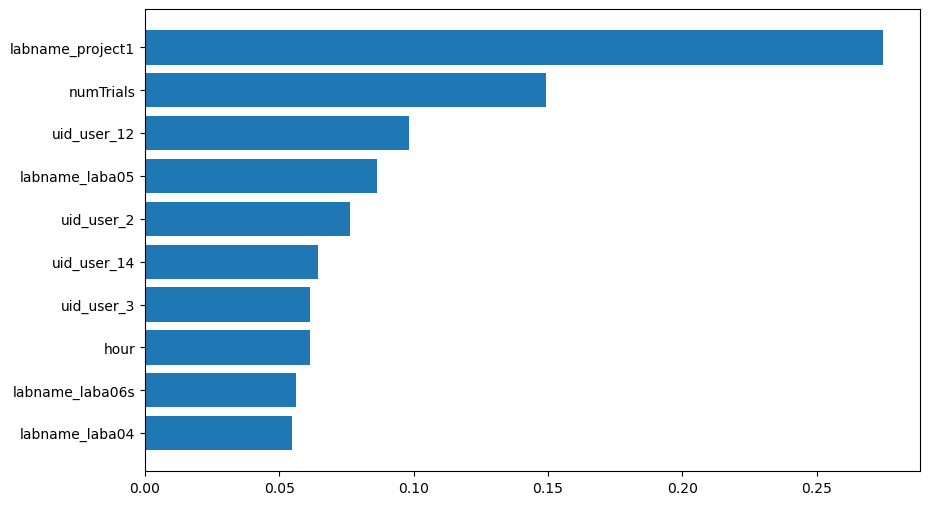

In [59]:
importance = tree.feature_importances_

# Индексы топ-10 наиболее важных признаков
top_indices = np.argsort(importance)[-10:]

# Подготовка данных для графика
top_features = top_indices[::-1]  # Обратный порядок для правильной сортировки
top_importance = importance[top_features][::-1]
top_feature_names = X.columns[top_features][::-1]  # Названия признаков

plot_barh(top_feature_names, top_importance)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [60]:
forest = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
forest.fit(X, y)
forest.score(X, y)

1.0

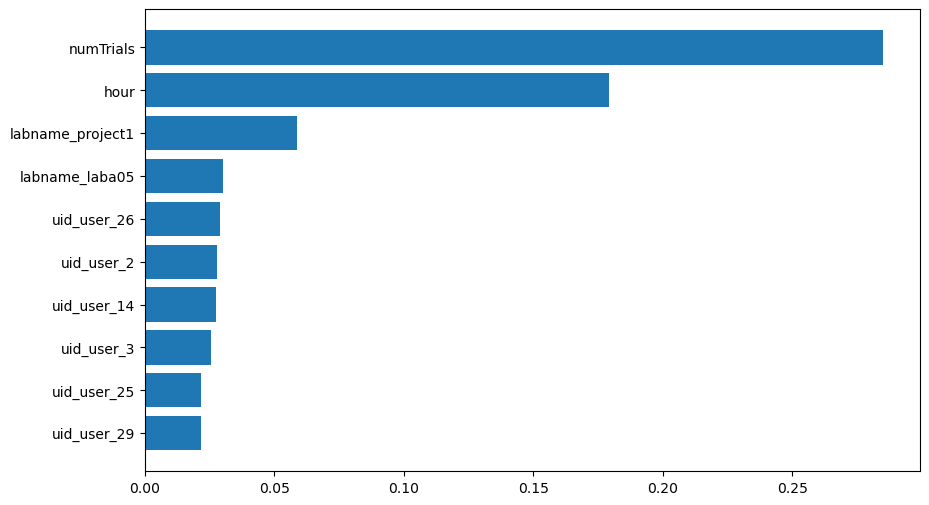

In [61]:
importance = forest.feature_importances_

# Индексы топ-10 наиболее важных признаков
top_indices = np.argsort(importance)[-10:]

# Подготовка данных для графика
top_features = top_indices[::-1]  # Обратный порядок для правильной сортировки
top_importance = importance[top_features][::-1]
top_feature_names = X.columns[top_features][::-1]  # Названия признаков

plot_barh(top_feature_names, top_importance)